

Вибірковий метод. Створення інтервального 
статистичного розподілу вибірки, графічні зображення 
та числові характеристики вибірки

In [12]:
# Імпорт вибіркових даних із Excel-файлу
import pandas as pd

df = pd.read_excel('sample12.xlsx', header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,2.205,-1.237,-1.475,1.989,1.311,1.920,1.512,0.626,-1.705,1.655
1,1.645,-1.134,-1.893,-1.823,1.307,-1.472,-1.557,1.821,1.358,2.886
2,0.253,-1.029,0.880,0.315,0.157,2.080,-0.981,-1.635,1.644,0.964
3,3.609,0.111,-0.184,0.911,1.348,0.406,0.155,-0.688,1.374,-1.736
4,1.011,1.344,-0.231,-0.662,0.009,-1.317,-3.234,-0.130,-0.474,-0.019
5,-1.124,-0.034,-0.365,0.300,0.555,-2.265,0.923,0.481,0.273,-0.122
6,0.249,0.299,0.306,-0.410,-1.369,-0.096,0.354,0.877,1.421,-4.194
7,-2.570,-1.549,-0.362,-0.006,-0.567,0.345,-1.037,-0.733,-0.841,1.191
8,-2.059,2.101,0.218,-0.359,-0.516,-0.078,-0.107,0.657,-0.707,-0.197
9,-0.472,-0.877,-0.497,-0.144,1.094,0.412,-0.990,0.107,-0.816,0.356


In [13]:
# Перетворення вибірки у відсортований одномірний масив

import numpy as np
X = df.to_numpy().flatten()
X = np.sort(X)
X

array([-4.194, -3.234, -2.57 , -2.265, -2.059, -1.893, -1.823, -1.736,
       -1.705, -1.635, -1.557, -1.549, -1.475, -1.472, -1.369, -1.317,
       -1.237, -1.134, -1.124, -1.037, -1.029, -0.99 , -0.981, -0.877,
       -0.841, -0.816, -0.733, -0.707, -0.688, -0.662, -0.567, -0.516,
       -0.497, -0.474, -0.472, -0.41 , -0.365, -0.362, -0.359, -0.231,
       -0.197, -0.184, -0.144, -0.13 , -0.122, -0.107, -0.096, -0.078,
       -0.034, -0.019, -0.006,  0.009,  0.107,  0.111,  0.155,  0.157,
        0.218,  0.249,  0.253,  0.273,  0.299,  0.3  ,  0.306,  0.315,
        0.345,  0.354,  0.356,  0.406,  0.412,  0.481,  0.555,  0.626,
        0.657,  0.877,  0.88 ,  0.911,  0.923,  0.964,  1.011,  1.094,
        1.191,  1.307,  1.311,  1.344,  1.348,  1.358,  1.374,  1.421,
        1.512,  1.644,  1.645,  1.655,  1.821,  1.92 ,  1.989,  2.08 ,
        2.101,  2.205,  2.886,  3.609])

In [14]:
# Обчислення розмаху: різниця між максимальним і мінімальним значеннями вибірки

R = X[-1] - X[0]
R

np.float64(7.803)

In [15]:
# Обчислення обсягу вибірки
n = len(X)
# Визначення оптимальної кількості інтервалів за формулою Стерджеса
m = int(np.round(1 + 3.3221 * np.log10(n)))
# Розрахунок ширини інтервалу з округленням та корекційною поправкою
k = np.round(R/m, 1) + 0.02
print(m, k)
# Визначення початку першого інтервалу зі зсувом на півінтервалу вліво
x_start = np.round(X[0] - k/2, 3)
x_start


8 1.02


np.float64(-4.704)

In [16]:
# Ініціалізація масиву для зберігання меж інтервалів (ліва та права границя)
intervals = np.zeros(shape=(m, 2), dtype=float)
# Встановлення меж першого інтервалу
intervals[0, 0] = x_start
intervals[0, 1] = np.round(x_start + k, 3)
# Побудова наступних інтервалів шляхом додавання ширини k до попередньої правої межі
for i in range(1, m):
    intervals[i, 0] = intervals[i-1, 1]
    intervals[i, 1] = np.round(intervals[i, 0] + k, 3)
intervals

array([[-4.704, -3.684],
       [-3.684, -2.664],
       [-2.664, -1.644],
       [-1.644, -0.624],
       [-0.624,  0.396],
       [ 0.396,  1.416],
       [ 1.416,  2.436],
       [ 2.436,  3.456]])

In [17]:
# Ініціалізація масиву для зберігання середніх значень кожного інтервалу
interval_mids = np.zeros(shape=m, dtype=float)
# Обчислення центрів інтервалів як середнього арифметичного лівої та правої меж
for i in range(m):
    interval_mids[i] = np.round((intervals[i, 0] + intervals[i, 1])/2, 3)
interval_mids

array([-4.194, -3.174, -2.154, -1.134, -0.114,  0.906,  1.926,  2.946])

In [18]:
# Ініціалізація масиву для збереження частот попадання значень у кожен інтервал
N = np.zeros(shape=m, dtype=int)

# Підрахунок кількості значень, що потрапляють у відповідні інтервали
for i in range(n):
    for j in range(m):
        if j != m - 1:
            if intervals[j, 0] <= X[i] < intervals[j, 1]:  # відкритий правий кінець
                N[j] += 1
                break
        else:
            if intervals[j, 0] <= X[i] <= intervals[j, 1]:  # останній інтервал включає обидві межі
                N[j] += 1
                break

# Виведення частотного розподілу по інтервалах
N

array([ 1,  1,  7, 21, 37, 20, 11,  1])

In [19]:
# Відносна частота
W = N / n
W

array([0.01, 0.01, 0.07, 0.21, 0.37, 0.2 , 0.11, 0.01])

In [20]:
# Накопичена частота
N_cum = np.cumsum(N)
N_cum

array([ 1,  2,  9, 30, 67, 87, 98, 99])

In [21]:
# Накопичена відносна частота
W_cum = N_cum / n
W_cum

array([0.01, 0.02, 0.09, 0.3 , 0.67, 0.87, 0.98, 0.99])

In [45]:
# Повна таблиця
d = {"Інтервал": [f"[{row[0]}; {row[1]})" for row in intervals],
     "Середини інтервалів x_i": interval_mids,
     "Частота n_i": N,
     "Частість w_i": W,
     "Накопичена частота n_i^нак": N_cum,
     "Накопичена частість w_i^нак": W_cum}
df2 = pd.DataFrame(data=d)
df2.loc[-1] = ['Сума', '-', sum(N), sum(W), '-', '-']
df2

,Інтервал,Середини інтервалів x_i,Частота n_i,Частість w_i,Накопичена частота n_i^нак,Накопичена частість w_i^нак
0,[-4.704; -3.684),-4.194,1,0.01,1,0.01
1,[-3.684; -2.664),-3.174,1,0.01,2,0.02
2,[-2.664; -1.644),-2.154,7,0.07,9,0.09
3,[-1.644; -0.624),-1.134,21,0.21,30,0.3
4,[-0.624; 0.396),-0.114,37,0.37,67,0.67
5,[0.396; 1.416),0.906,20,0.20,87,0.87
6,[1.416; 2.436),1.926,11,0.11,98,0.98
7,[2.436; 3.456),2.946,1,0.01,99,0.99
-1,Сума,-,99,0.99,-,-


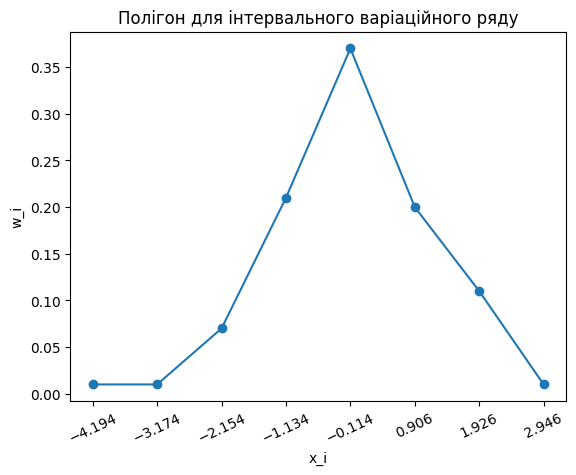

In [23]:
# Полігон для інтервального варіаційного ряду
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(interval_mids, W, marker='o')
plt.xticks(interval_mids, rotation=25)
ax.set_xlabel('x_i')
ax.set_ylabel('w_i')
ax.set_title("Полігон для інтервального варіаційного ряду")
plt.show()

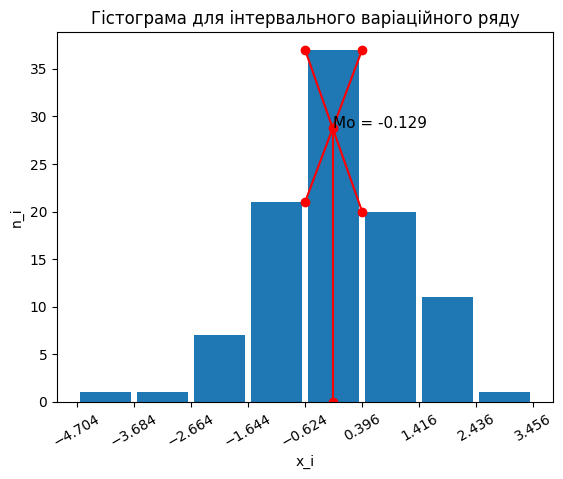

In [25]:
# Гістограма для інтервального варіаційного ряду
fig, ax = plt.subplots()
bins = np.append(intervals[:, 0], intervals[-1, 1])
plt.hist(X, bins=bins, rwidth=0.9)
plt.xticks(bins, rotation=30)

# Мода
mo_index = N.argmax()
if not 0 < mo_index < m-1:
    raise Exception("Неможливо знайти моду методом лінійної інтерполяції")

line_x = [intervals[mo_index, 0], intervals[mo_index, 1]]
line1_y = [N[mo_index-1], N[mo_index]]
line2_y = [N[mo_index], N[mo_index+1]]
frac_1 = (line1_y[1] - line1_y[0]) / (line_x[1] - line_x[0])
k_1, b_1 = frac_1, line1_y[0] - frac_1 * line_x[0]
frac_2 = (line2_y[1] - line2_y[0]) / (line_x[1] - line_x[0])
k_2, b_2 = frac_2, line2_y[0] - frac_2 * line_x[0]
intersect_x = (b_2 - b_1) / (k_1 - k_2)
intersect_y = k_1 * intersect_x + b_1

plt.plot(line_x, line1_y, color='red', marker='o')
plt.plot(line_x, line2_y, color='red', marker='o')
plt.plot([intersect_x, intersect_x], [0, intersect_y], color='red', marker='o')
plt.annotate(f"Mo = {intersect_x:.3f}", xy=(intersect_x, intersect_y), fontsize=11)
ax.set_xlabel('x_i')
ax.set_ylabel('n_i')
ax.set_title("Гістограма для інтервального варіаційного ряду")
plt.show()

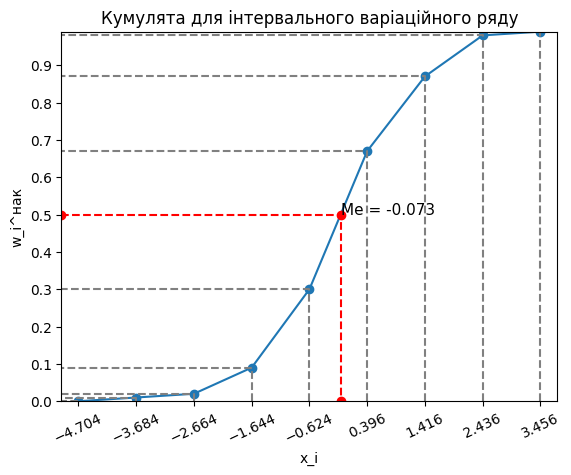

In [26]:
# Кумулята для інтервального варіаційного ряду
fig, ax = plt.subplots()
x_i = np.append(intervals[:, 0], intervals[-1, 1])
y_i = np.append(0, W_cum)
plt.plot(x_i, y_i, marker='o')

delta = 0.3
for x, y in zip(x_i, y_i):
    plt.plot([x, x, x_i[0] - delta], [0, y, y], color='grey', linestyle='--')

# Медіана
me_upper_index = 0
for i in range(len(y_i)):
    if y_i[i] > 0.5:
        me_upper_index = i
        break
line_x = [x_i[me_upper_index-1], x_i[me_upper_index]]
line_y = [y_i[me_upper_index-1], y_i[me_upper_index]]
frac = (line_y[1] - line_y[0]) / (line_x[1] - line_x[0])
k, b = frac, line_y[0] - frac * line_x[0]
intersect_x = (0.5 - b) / k

plt.plot([x_i[0] - delta, intersect_x, intersect_x],
         [0.5, 0.5, 0], color='red', marker='o', linestyle='--')
plt.annotate(f"Me = {intersect_x:.3f}", xy=(intersect_x, 0.5), fontsize=11)
plt.xticks(x_i, rotation=25)
plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
plt.ylim(0, W_cum[-1])
plt.xlim(x_i[0] - delta , x_i[-1] + delta)
ax.set_title("Кумулята для інтервального варіаційного ряду")
ax.set_xlabel('x_i')
ax.set_ylabel('w_i^нак')
plt.show()

In [27]:
# Середнє зважене вибіркове
x_average = np.round(np.average(a=interval_mids, weights=N), 3)

# Центральний момент nu_k k-го порядку
def nu_k(k_order: int, x_data, average, numbers):
    return np.round(np.average((x_data - average)**k_order, weights=numbers), 3)

# Вибіркова дисперсія
x_variance = nu_k(2, interval_mids, x_average, N)
# Стандартне квадратичне відхилення
x_std = np.round(np.sqrt(x_variance), 3)
# Коефіцієнт асиметрії
a_wave = nu_k(3, interval_mids, x_average, N) / np.power(x_std, 3)
if a_wave == 0:
    print("Розподіл має симетричну форму")
elif a_wave > 0:
    print("Розподіл має правосторонню асиметрію")
else:
    print("Розподіл має лівосторонню асиметрію")

# Ексцес
e_wave = nu_k(4, interval_mids, x_average, N) / np.power(x_variance, 2) - 3
if e_wave > 0:
    print("Полігон варіаційного ряду має більш круту вершину в порівнянні з нормальною кривою")
elif e_wave < 0:
    print("Полігон варіаційного ряду має більш пологу вершину в порівнянні з нормальною кривою")

print(x_average, x_variance, x_std, a_wave, e_wave)

Розподіл має лівосторонню асиметрію
Полігон варіаційного ряду має більш круту вершину в порівнянні з нормальною кривою
-0.083 1.544 1.243 -0.25878732580917696 0.448079143064243


In [28]:
# Коефіцієнт варіації
if interval_mids[0] * interval_mids[-1] < 0: # Різні знаки крайніх значень
    print("Вибірка містить як від'ємні, так і додатні значення, отже вибірка є неоднорідною")
else:
    v_wave = np.round(np.sqrt(x_variance) / x_average * 100, 3)
    if np.abs(v_wave) < 25:
        print("Вибірка є однорідною")
    elif 25 <= np.abs(v_wave) < 50:
        print("Вибірка має деякі розбіжності")
    else:
        print("Вибірка є неоднорідною")

Вибірка містить як від'ємні, так і додатні значення, отже вибірка є неоднорідною




Точкові та інтервальні оцінки параметрів розподілу. 
Методи знаходження точкових оцінок. Побудова 
довірчих інтервалів. Перевірка статистичних гіпотез.

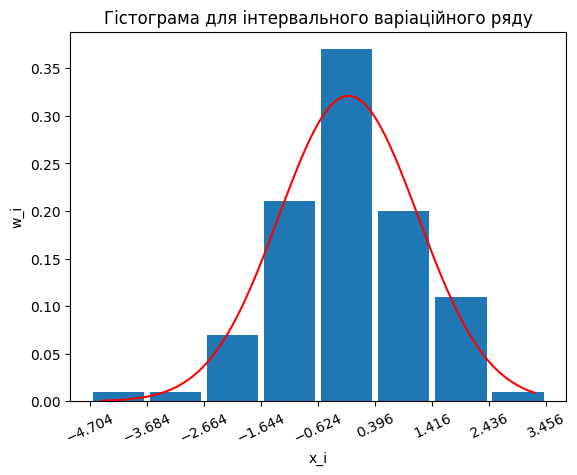

In [29]:
# За гістограмою спостерігається теоретична залежність між значеннями інтервального розподілу та їхніми відносними частотами, що наближається до нормального розподілу.

# Гістограма для інтервального варіаційного ряду
fig, ax = plt.subplots()
bins = np.append(intervals[:, 0], intervals[-1, 1])
plt.hist(interval_mids, weights=W, bins=bins, rwidth=0.9)

# Нормальна крива за незміщеними оцінками
x_norm = np.linspace(interval_mids[0] - delta, interval_mids[-1] + delta, 100)
from scipy.stats import norm
plt.plot(x_norm, norm.pdf(x_norm, loc=x_average, scale=np.sqrt(x_variance)), color='red')

plt.xticks(bins, rotation=25)
ax.set_xlabel('x_i')
ax.set_ylabel('w_i')
ax.set_title("Гістограма для інтервального варіаційного ряду")
plt.show()

In [30]:
# Незміщена оцінка генерального середнього - вибіркове середнє
print(x_average)

# Ефективна (найкраща незміщена оцінка) дисперсії - вибіркова дисперсія
print(x_variance)

-0.083
1.544


In [32]:
# Побудуємо довірчий інтервал для середнього значення генеральної сукупності при довірчій ймовірності 0.95.
import scipy.stats as st
gamma = 0.95
t = np.round(st.norm.ppf(gamma), 3)
sigma = x_std
delta = t * sigma

print(f"delta: {delta:.3f}")
print(f"Довірчий інтервал для генерального середнього: [{(x_average - delta):.3f}; {(x_average + delta):.3f}]")

delta: 2.045
Довірчий інтервал для генерального середнього: [-2.128; 1.962]


In [33]:
# Побудуємо довірчий інтервал для дисперсії генеральної сукупності при довірчій ймовірності 0.95.
gamma = 0.95
X_sq_1 = st.chi2.isf((1+gamma)/2, n-1, loc=0, scale=1)
X_sq_2 = st.chi2.isf((1-gamma)/2, n-1, loc=0, scale=1)
start = n * x_variance / X_sq_1
end = n * x_variance / X_sq_2
if not start < end:
    end, start = start, end
print(f"Довірчий інтервал для генеральної дисперсії: [{start:.3f}; {end:.3f}]")

Довірчий інтервал для генеральної дисперсії: [1.202; 2.105]


In [34]:
# Сформулюємо нульову та альтернативну гіпотези:  𝐻0:𝑎=−0.25, 𝐻1:𝑎<−0.25
# На рівні значущості 𝛼=0.05 перевіримо коректність нульової гіпотези відносно альтернативної та визначимо потужність статистичного критерію.

# Т спостереження
a_0 = -0.25
alpha = 0.05
s = np.sqrt(1/(n-1) * np.sum((interval_mids - x_average)**2 * N))
T_obs = np.round((x_average - a_0) / s * np.sqrt(n-1), 3)

# t критичне
t_cr = np.round(st.t.ppf(1-alpha, n-1), 3)

if np.abs(T_obs) >= t_cr or T_obs >= t_cr or T_obs <= -t_cr:
    print("Гіпотеза H_0 відхилається")
else:
    print("Гіпотеза H_0 не відхилається, отже приймається")

T_obs, t_cr

Гіпотеза H_0 не відхилається, отже приймається


(np.float64(1.337), np.float64(1.66))

In [35]:
# Потужність критерію
a_1 = -0.2
phi_arg = t_cr - (a_0-a_1)/s * np.sqrt(n-1)
criteria_power = np.round(st.norm.cdf(phi_arg), 3)
criteria_power

np.float64(0.98)

In [36]:
# Мінімальний обсяг вибірки, що забезпечує даний рівень значущості та потужність критерію
beta = 1 - criteria_power
n_min = np.round((st.t.ppf(1-2*alpha, n-1) + st.t.ppf(1-beta, n-1))**2 * x_variance /
                 (a_0 - a_1)**2)
print(n_min)

7020.0
